# Exercise 7 - Approximating the Sine function

### Task

Approximate the sine function with a fully connected neural network using PyTorch.
* Change the neural network architecture to a single hidden layer with two neurons.
  * What do you observe?
Increase the number of neurons per layer and the number of layers. Try e.g., [2] and [50,50]. What do you observe?
  * Name ways to overcome this problem.
* Take a look at the cost function history. At what epoch should the algorithm stop to prevent overfitting?
* Set the learning rate to α = 0.1. What do you observe?
* Reset the learning rate to α 0.001 and set λ > 0 where the model fits the sine curve without overfitting.
* Increase λ until underfitting occurs and plot the result.
* Change the model to use ReLU activation function and plot the result.
* Why does the neural network not learn the sine function properly at the boundaries (and beyound the bondaries)?

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

data generation

In [4]:
torch.manual_seed(0)

f = lambda x: torch.sin(2 * torch.pi * x)

numberOfSamples = 40
noise = 0.1

xTrain = torch.rand((numberOfSamples, 1)) * 2 -1
yTrain = f(xTrain) + noise * (torch.rand(xTrain.shape) * 2 -1)

xTest = torch.rand((numberOfSamples, 1)) * 2 -1
yTest = f(xTest) + noise * (torch.rand(xTest.shape) * 2 - 1)

model setup

In [7]:
inputDimension = 1
hiddenDimensions = [20, 20] # 2 hidden layers with 20 neurons each
outputDimension = 1

nonlinearity = torch.nn.Sigmoid()

In [8]:
modules = []
modules.append(torch.nn.Linear(inputDimension, hiddenDimension[0]))
modules.append(nonlinearity)
for i in range(len(hiddenDimensions) - 1):
    modules.append(torch.nn.Linear(hiddenDimension[i], hiddenDimension[i + 1]))
    modules.append(nonlinearity)

modules.append(torch.nn.Linear(hiddenDimension[-1], outputDimension))

model = torch.nn.Sequential(*modules)

hyperparameters & optimizer

In [10]:
epochs = 10000
lr = 1e-3
regularization = 1e-4

optimizer = torch.optim.Adam(
    model.parameters(), lr, weight_decay=regularization
)  # weight_decay is L2 regularization in Adam

cost function

In [11]:
def costFunctions(yPred, y):
    cost = torch.mean((yPred - y) ** 2)
    return cost

training loop

In [12]:
costHistoryTrain = np.zeros(epochs)
costHistoryTest = np.zeros(epochs)

for epoch in range(epochs):
    yPred = model(xTrain)
    cost = costFunctions(yPred, yTrain)

    with torch.no_grad():
        yPredTest = model(xTest)
        costTest = costFunctions(yPredTest, yTest)

    costHistoryTrain[epoch] = cost.detach()
    costHistoryTest[epoch] = costTest

    cost.backward()

    optimizer.step()

    if epoch % 100 == 0:
        string = "Epoch: {}/{}\t\tTraining cost = {:.2e}\t\tValidation cost = {:.2e}"
        print(string.format(epoch, epochs, cost.detach(), costTest))

Epoch: 0/10000		Training cost = 7.23e-01		Validation cost = 6.37e-01
Epoch: 100/10000		Training cost = 5.32e-01		Validation cost = 4.91e-01
Epoch: 200/10000		Training cost = 4.99e-01		Validation cost = 5.07e-01
Epoch: 300/10000		Training cost = 5.49e-01		Validation cost = 5.81e-01
Epoch: 400/10000		Training cost = 5.21e-01		Validation cost = 4.87e-01
Epoch: 500/10000		Training cost = 5.59e-01		Validation cost = 5.12e-01
Epoch: 600/10000		Training cost = 5.17e-01		Validation cost = 4.90e-01
Epoch: 700/10000		Training cost = 5.11e-01		Validation cost = 5.12e-01
Epoch: 800/10000		Training cost = 5.44e-01		Validation cost = 5.65e-01
Epoch: 900/10000		Training cost = 5.52e-01		Validation cost = 5.76e-01
Epoch: 1000/10000		Training cost = 5.17e-01		Validation cost = 5.24e-01
Epoch: 1100/10000		Training cost = 5.06e-01		Validation cost = 4.88e-01
Epoch: 1200/10000		Training cost = 5.36e-01		Validation cost = 4.97e-01
Epoch: 1300/10000		Training cost = 5.57e-01		Validation cost = 5.09e-01
Epoc

visualize the prediction

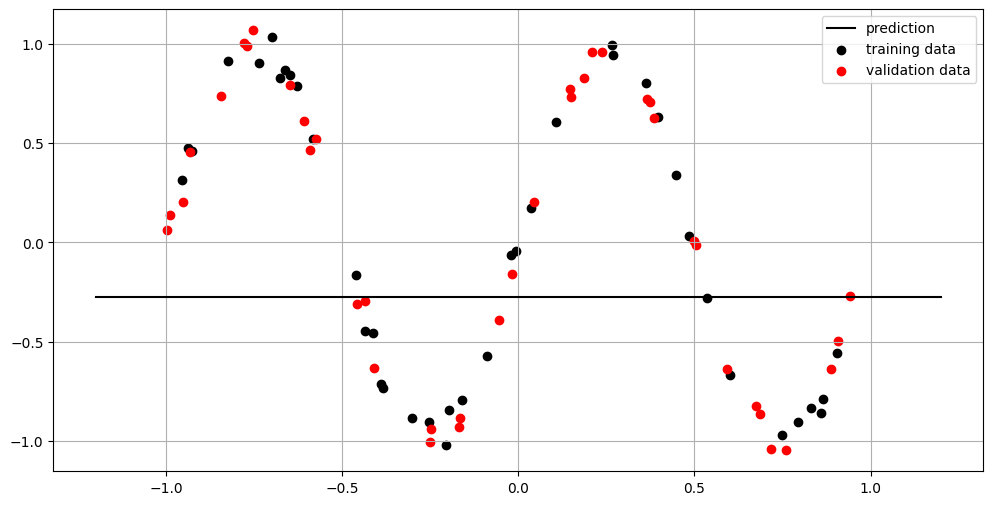

In [13]:
x = torch.linspace(-1.2, 1.2, 100).unsqueeze(1)
yPred = model(x).detach()

fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.plot(x, yPred, "k", label="prediction")
ax.scatter(xTrain, yTrain, c="k", label="training data")
ax.scatter(xTest, yTest, c="r", label="validation data")
ax.legend()
plt.show()

compute derivative visualization for reference

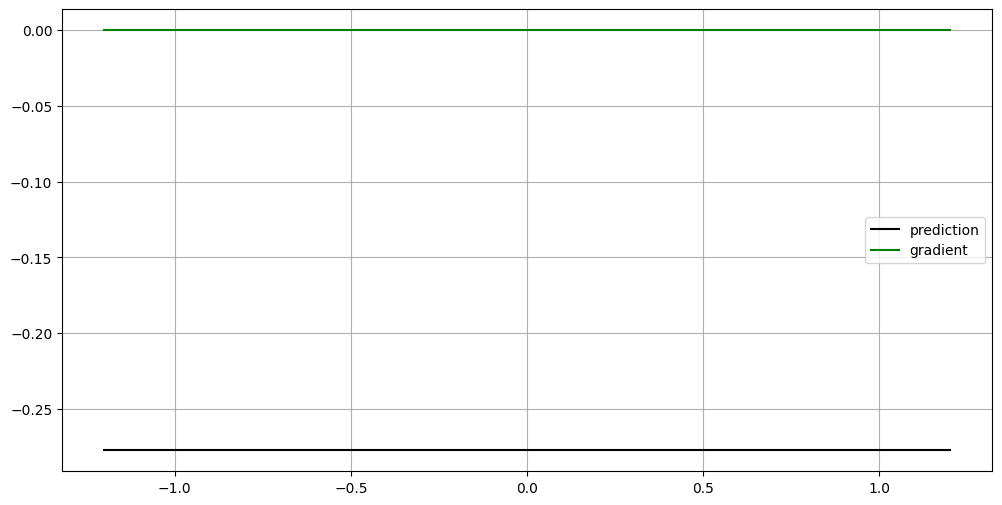

In [14]:
x = torch.linspace(-1.2, 1.2, 100, requires_grad=True).unsqueeze(1)
yPred = model(x)
gradients = torch.autograd.grad(yPred, x, grad_outputs=torch.ones_like(yPred))[0]

fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.plot(x.detach().numpy(), yPred.detach().numpy(), "k", label="prediction")
ax.plot(x.detach().numpy(), gradients, 'g', label="gradient")
ax.legend()
plt.show()
